To do word counts based estimates


In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.text import *
import string
from unidecode import unidecode


In [3]:
df = pd.read_csv('after_05_12_2019_meeting_better_bal.csv')

valid_idx = df[df.valid].index
train_idx = df[~df.valid].index

bal_idx = []
for k, v in zip(df.index, df.bal):
    bal_idx += [k]*v



In [4]:
train_df = df.iloc[train_idx, [0,3]]
bal_df = df.iloc[bal_idx, [0,3]]
valid_df = df.iloc[valid_idx, [0,3]]

In [5]:
labels = train_df.label.unique()
big_list = []
for label in labels:
    counts = Counter(_ for _ in " ".join((list(train_df.ascii_name_fix[train_df.label==label]))).split()).most_common(100)
    big_list += [[word[0],label] for word in counts]

In [37]:
labels

array(['Other', 'Chicken', 'Pizza', 'Indian', 'Chinese', 'Burgers', 'Sandwich / Coffee Shops / Bakery', 'Desserts',
       'Fish & Chips', 'Kebab'], dtype=object)

In [6]:
 df2 = pd.DataFrame.from_records(big_list, columns=['word', 'label'])

In [7]:
name_classes = df2.\
  groupby('word').\
  nunique().label.sort_values(ascending=False)


In [8]:
name_classes[name_classes == 6].tail(67)

word
star      6
lounge    6
pizza     6
ltd       6
hot       6
kebab     6
town      6
royal     6
taste     6
2         6
Name: label, dtype: int64

In [9]:
df_dupe = df2[df2.word.isin(name_classes[name_classes > 1].index)]
df_dupe = df_dupe[['label','word']]
piv = df_dupe.pivot_table(index = 'word', values='label', columns = 'label', aggfunc=len, fill_value = 0)

just remove all the duplicated names

In [28]:
df3 = df2[~df2.word.isin(name_classes[name_classes > 1].index)]

In [46]:
df_temp = pd.DataFrame.from_records([['chips','Fish & Chips'], ['fish','Fish & Chips'], ['sea','Fish & Chips'], ['ocean','Fish & Chips'], ['golden','Chinese'], ['happy','Chinese'], ['garden','Chinese'], ['inn','Chinese'], ['curry','Indian'], ['balti','Indian'], ['pearl','Indian'], ['burger','Burgers'], ['burgers','Burgers'], ['diner','Burgers'], ['kebab','Kebab'], ['kebabs','Kebab'], ['pizza','Pizza'], ['pizzeria','Pizza'], ['sandwich','Sandwich / Coffee Shops / Bakery'], ['cafe','Sandwich / Coffee Shops / Bakery'], ['caribbean','Other'], ['sushi','Other'], ['rooster','Chicken'], ['chicken','Chicken']], columns = ['word', 'label'])

In [47]:
df4 = df3.append(df_temp, ignore_index = True)

In [57]:
df4[df4.label=='Chinese']

,word,label
138,chinese,Chinese
139,thai,Chinese
140,wok,Chinese
141,china,Chinese
142,oriental,Chinese
143,dragon,Chinese
144,noodle,Chinese
145,hong,Chinese
146,kong,Chinese
147,beijing,Chinese


In [49]:
my_dict = df4.set_index('word').T.to_dict('label')

In [50]:
my_dict['burger']

['Burgers']

In [54]:
final_list =[]
for name in valid_df.ascii_name_fix:
    little_list = []
    for item in name.split():
        if item in my_dict:
            little_list += my_dict[item]
    if not little_list:
        final_list.append('Other')
    else:
        final_list.append(Counter(little_list).most_common(1)[0][0])

In [55]:
final_list

['Other',
 'Other',
 'Indian',
 'Desserts',
 'Chinese',
 'Other',
 'Pizza',
 'Burgers',
 'Fish & Chips',
 'Other',
 'Other',
 'Other',
 'Burgers',
 'Other',
 'Other',
 'Sandwich / Coffee Shops / Bakery',
 'Chinese',
 'Fish & Chips',
 'Other',
 'Other',
 'Pizza',
 'Other',
 'Other',
 'Other',
 'Other',
 'Desserts',
 'Burgers',
 'Other',
 'Indian',
 'Pizza',
 'Other',
 'Fish & Chips',
 'Other',
 'Pizza',
 'Chinese',
 'Fish & Chips',
 'Other',
 'Pizza',
 'Other',
 'Other',
 'Other',
 'Fish & Chips',
 'Burgers',
 'Other',
 'Indian',
 'Pizza',
 'Fish & Chips',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Fish & Chips',
 'Chinese',
 'Other',
 'Other',
 'Pizza',
 'Fish & Chips',
 'Other',
 'Pizza',
 'Other',
 'Other',
 'Sandwich / Coffee Shops / Bakery',
 'Pizza',
 'Chicken',
 'Pizza',
 'Pizza',
 'Other',
 'Pizza',
 'Chicken',
 'Chicken',
 'Chicken',
 'Chicken',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Desserts',
 'Desserts',
 'Other',
 'Other',
 'Other',

In [68]:
Counter(final_list).most_common()

[('Other', 2214),
 ('Fish & Chips', 393),
 ('Sandwich / Coffee Shops / Bakery', 350),
 ('Pizza', 344),
 ('Desserts', 339),
 ('Chicken', 338),
 ('Chinese', 336),
 ('Kebab', 256),
 ('Indian', 224),
 ('Burgers', 206)]

In [70]:
valid_df['predict'] = final_list
valid_df['ind'] = valid_df['label'] == valid_df['predict']
results = valid_df.groupby(['label'])['ind'].agg(sum).reset_index()
sum(results['ind']/500)/10

0.5204000000000001

In [67]:
results

,label,ind
0,Burgers,143.0
1,Chicken,275.0
2,Chinese,267.0
3,Desserts,294.0
4,Fish & Chips,346.0
5,Indian,176.0
6,Kebab,201.0
7,Other,425.0
8,Pizza,267.0
9,Sandwich / Coffee Shops / Bakery,208.0


In [71]:
from sklearn.metrics import confusion_matrix

In [92]:
df_confusion = confusion_matrix(valid_df['label'], valid_df['predict'], labels = results['label'])
#df_confusion = pd.crosstab(valid_df['label'], valid_df['predict'], rownames=['Actual'], colnames=['Predicted'], margins=True)

In [100]:
    def plot_confusion_matrix(df_confusion, classes, normalize:bool=False, title:str='Confusion matrix', cmap:Any="Blues", figsize:tuple=None):
        "Plot the confusion matrix"
        # This function is copied from the scikit docs
        cm = df_confusion
        plt.figure(figsize=figsize)
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

        if normalize: cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

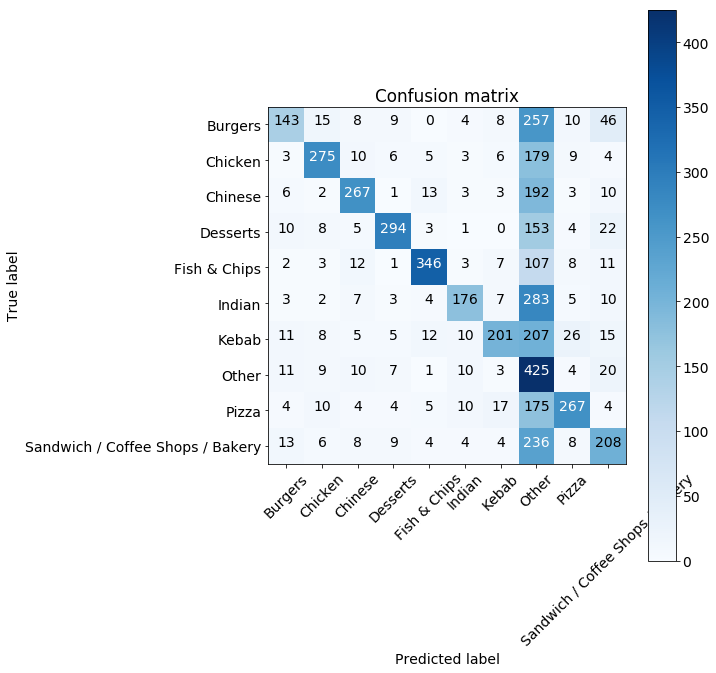

In [102]:
plot_confusion_matrix(df_confusion, classes = results['label'], figsize=(10,10))